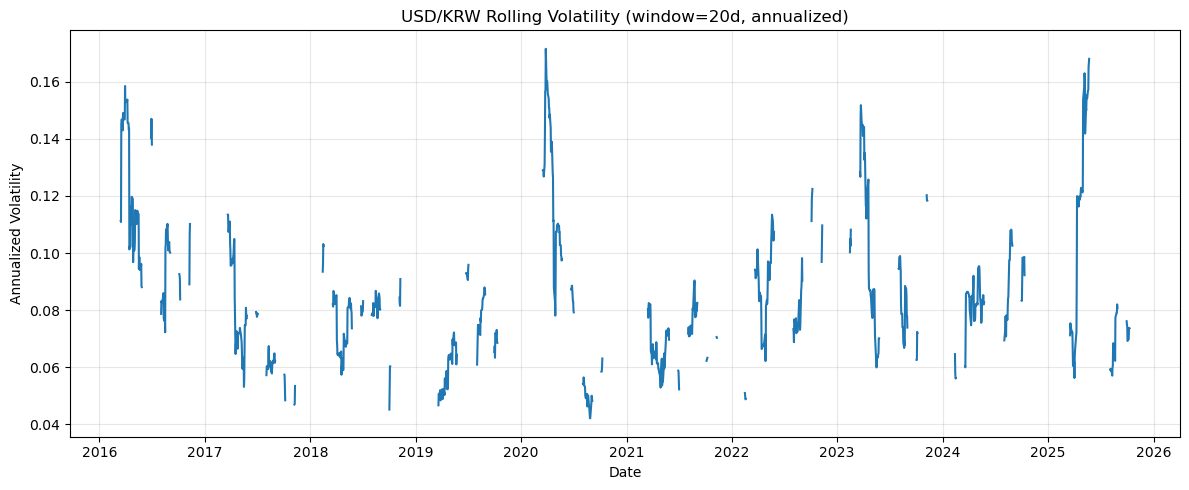

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) 데이터 로드
# =========================
# 예: PATH_FX = "DEXKOUS-old.csv"
PATH_FX = "../dataset/DEXKOUS-old.csv"
fx = pd.read_csv(PATH_FX)

# 컬럼명 표준화 (FRED 형식: observation_date, DEXKOUS)
fx["observation_date"] = pd.to_datetime(fx["observation_date"])
fx = fx.sort_values("observation_date").set_index("observation_date")

# 값 컬럼을 숫자로 변환 (혹시 결측/문자 섞여있으면 NaN 처리)
fx["DEXKOUS"] = pd.to_numeric(fx["DEXKOUS"], errors="coerce")

# 분석 구간(원하면 조정)
fx = fx.loc["2016-01-01":"2026-01-01"].copy()

# =========================
# 2) 로그수익률 & 롤링 변동성
# =========================
fx["log_ret"] = np.log(fx["DEXKOUS"]).diff()

window = 20  # 20거래일(약 1개월). 60(3개월), 120(6개월) 등으로 바꿔도 됨
trading_days = 252

fx["vol_rolling"] = fx["log_ret"].rolling(window).std() * np.sqrt(trading_days)

# =========================
# 3) 시각화
# =========================
plt.figure(figsize=(12, 5))
plt.plot(fx.index, fx["vol_rolling"])
plt.title(f"USD/KRW Rolling Volatility (window={window}d, annualized)")
plt.ylabel("Annualized Volatility")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


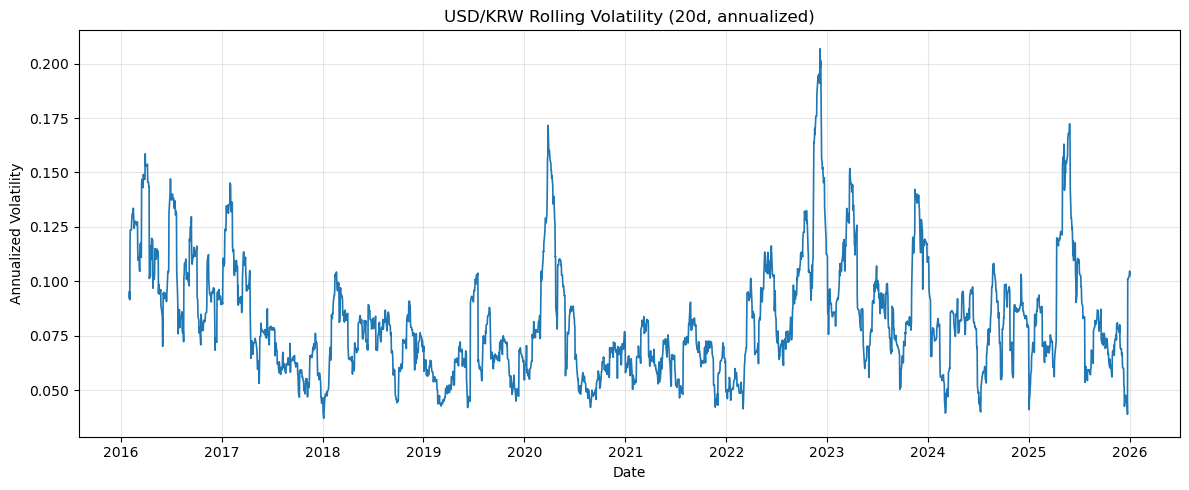

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1) 데이터 로드
# -------------------------
fx = pd.read_csv("../dataset/DEXKOUS-old.csv")
fx["observation_date"] = pd.to_datetime(fx["observation_date"])
fx = fx.sort_values("observation_date").set_index("observation_date")

fx["DEXKOUS"] = pd.to_numeric(fx["DEXKOUS"], errors="coerce")

# 분석 구간
fx = fx.loc["2016-01-01":"2026-01-01"].copy()

# -------------------------
# 2) 날짜를 영업일로 재정렬 (핵심)
# -------------------------
fx = fx.asfreq("B")   # Business day 기준으로 날짜 채우기
fx["DEXKOUS"] = fx["DEXKOUS"].ffill()  # 환율은 forward fill

# -------------------------
# 3) 로그수익률 & 변동성
# -------------------------
fx["log_ret"] = np.log(fx["DEXKOUS"]).diff()

window = 20
fx["vol_20d"] = fx["log_ret"].rolling(window).std() * np.sqrt(252)

# -------------------------
# 4) 시각화 (NaN 제거 후 plot)
# -------------------------
vol = fx["vol_20d"].dropna()

plt.figure(figsize=(12, 5))
plt.plot(vol.index, vol.values, linewidth=1.2)
plt.title("USD/KRW Rolling Volatility (20d, annualized)")
plt.ylabel("Annualized Volatility")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
